In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
# Učitavanje originalne datoteke podataka
path = Path.cwd()
path = str(path) + "/data_po_godinama/data_2015.csv"
df = pd.read_csv(path)
df['broj_djece_gostiju']= df['broj_djece_gostiju'].astype('int64')
df['hotel_id']= df['hotel_id'].astype('int64')
df.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
0,0,2015-07-01,2015-01-21,2015-07-01,NaN,2,0,PRT,0,0,100.000000,Check-Out,1313223,1077152
1,0,2015-07-01,2015-06-10,2015-07-01,NaN,2,0,PRT,0,0,100.000000,Check-Out,1313224,1017906
2,0,2015-07-01,2015-05-13,2015-07-02,NaN,1,0,GBR,0,1,64.991345,Check-Out,1313225,1039896
3,0,2015-07-01,2014-05-30,2015-07-02,NaN,1,0,GBR,1,1,74.368897,Check-Out,1313226,1008245
4,0,2015-07-01,2014-07-06,2015-07-03,NaN,2,0,GBR,2,1,130.973278,Check-Out,1313227,1093703


In [9]:
df.describe()

,hotel_id,broj_odraslih_gostiju,broj_djece_gostiju,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,rezervacija_id,gost_id
count,21967.000000,21967.00000,21967.000000,21967.000000,21967.000000,21967.000000,2.196700e+04,2.196700e+04
mean,0.621751,1.83284,0.071926,1.681022,1.379023,110.337499,1.355410e+06,1.053687e+06
std,0.484961,0.84919,0.344594,0.686226,1.076477,53.084045,2.880630e+04,3.086074e+04
min,0.000000,0.00000,0.000000,0.000000,0.000000,40.004374,1.313223e+06,1.000014e+06
25%,0.000000,2.00000,0.000000,2.000000,1.000000,72.822454,1.329670e+06,1.026938e+06
50%,1.000000,2.00000,0.000000,2.000000,1.000000,100.000000,1.355944e+06,1.053816e+06
75%,1.000000,2.00000,0.000000,2.000000,1.000000,134.588955,1.388726e+06,1.080150e+06
max,1.000000,55.00000,10.000000,4.000000,8.000000,744.266820,1.416853e+06,1.107287e+06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21967 entries, 0 to 21966
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hotel_id                       21967 non-null  int64  
 1   datum_dolaska                  21967 non-null  object 
 2   datum_kreiranja_rezervacije    21967 non-null  object 
 3   datum_odjave                   21967 non-null  object 
 4   datum_otkazivanja_rezervacije  8141 non-null   object 
 5   broj_odraslih_gostiju          21967 non-null  int64  
 6   broj_djece_gostiju             21967 non-null  int64  
 7   zemlja_gosta                   21967 non-null  object 
 8   kanal_prodaje_id               21967 non-null  int64  
 9   tip_sobe_id                    21967 non-null  int64  
 10  cijena_nocenja                 21967 non-null  float64
 11  status_rezervacije             21967 non-null  object 
 12  rezervacija_id                 21967 non-null 

In [22]:
df['datum_dolaska'] = pd.to_datetime(df['datum_dolaska'])
df['datum_kreiranja_rezervacije'] = pd.to_datetime(df['datum_kreiranja_rezervacije'])
df['datum_otkazivanja_rezervacije'] = pd.to_datetime(df['datum_otkazivanja_rezervacije'])

In [23]:
# Adding a new column for the total number of guests
df['ukupan_broj_gostiju'] = df['broj_odraslih_gostiju'] + df['broj_djece_gostiju']

# Saving the updated dataframe back to a CSV file
df.to_csv(path, index=False)

In [24]:
dnevni_pregled = df.groupby(df['datum_dolaska'].dt.date).agg(
    ukupan_broj_gostiju=pd.NamedAgg(column='ukupan_broj_gostiju', aggfunc='sum'),
    broj_djece_gostiju=pd.NamedAgg(column='broj_djece_gostiju', aggfunc='sum'),
    broj_odraslih_gostiju=pd.NamedAgg(column='broj_odraslih_gostiju', aggfunc='sum')
).reset_index()


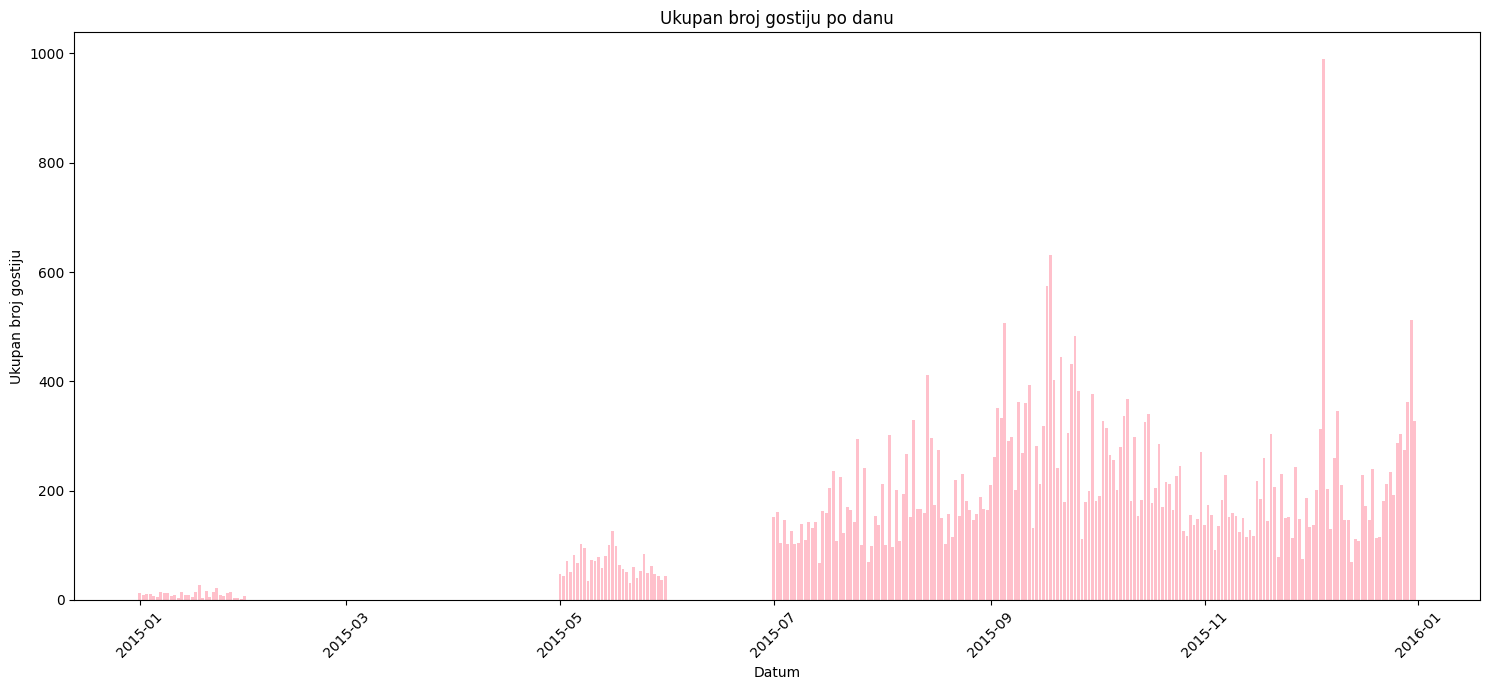

In [25]:
# Crtanje grafikona
plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(dnevni_pregled['datum_dolaska'], dnevni_pregled['ukupan_broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju po danu')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

In [26]:
dnevni_pregled.describe()

,ukupan_broj_gostiju,broj_djece_gostiju,broj_odraslih_gostiju
count,246.000000,246.000000,246.000000
mean,170.089431,6.422764,163.666667
std,126.697519,6.720676,123.242298
min,2.000000,0.000000,2.000000
25%,85.750000,1.000000,84.000000
50%,152.500000,5.000000,148.000000
75%,228.000000,9.000000,216.500000
max,989.000000,41.000000,948.000000


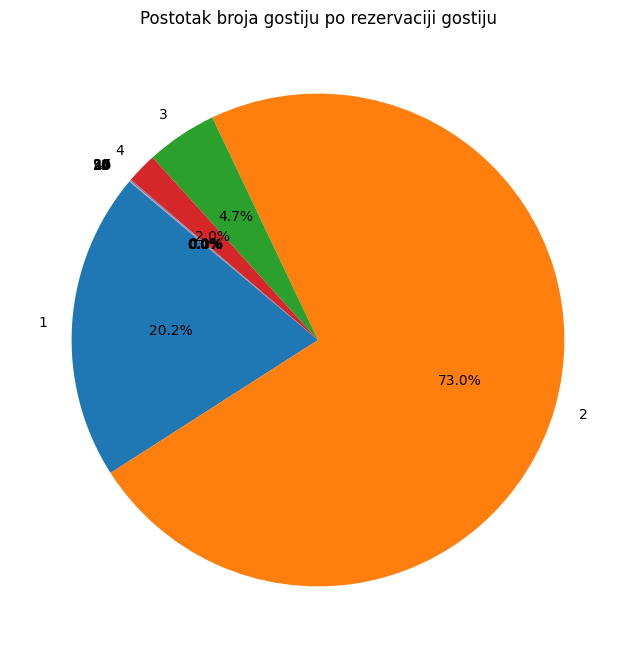

In [27]:
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = df['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju')
plt.show()

In [28]:
#racunanje broja ljudi u hotelu na dani natum (ne ukljucuje otkazane rezervacije)
hotel0 = df[df['hotel_id']==0]
occupancy = hotel0[(hotel0['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

/var/folders/53/p2lb37cn0q585phbmwkzd9kc0000gn/T/ipykernel_66610/506926050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
/var/folders/53/p2lb37cn0q585phbmwkzd9kc0000gn/T/ipykernel_66610/506926050.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])


,datum,broj_gostiju
0,2015-07-01,68
1,2015-07-02,131
2,2015-07-03,168
3,2015-07-04,230
4,2015-07-05,256


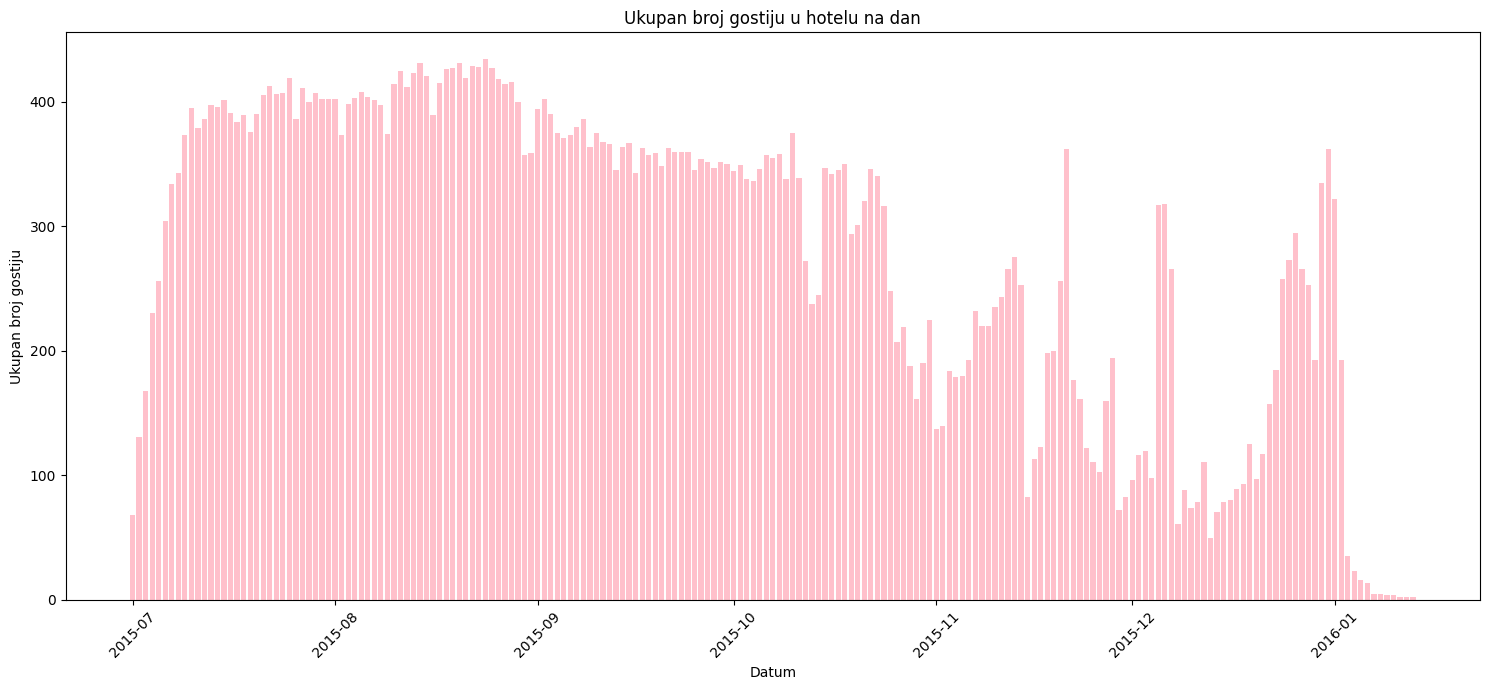

In [29]:
plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

/var/folders/53/p2lb37cn0q585phbmwkzd9kc0000gn/T/ipykernel_66610/3446052201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
/var/folders/53/p2lb37cn0q585phbmwkzd9kc0000gn/T/ipykernel_66610/3446052201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])


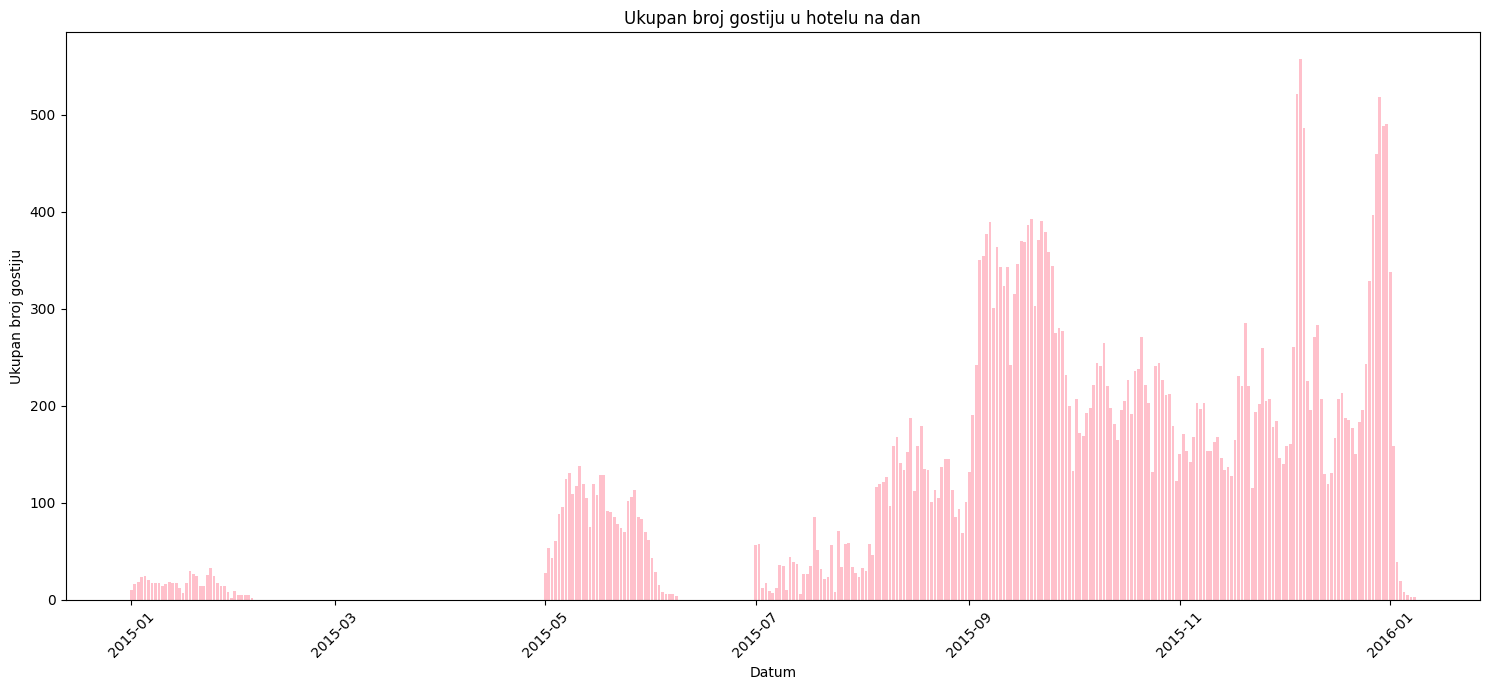

In [30]:
hotel1 = df[df['hotel_id']==1]
occupancy = hotel1[(hotel1['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

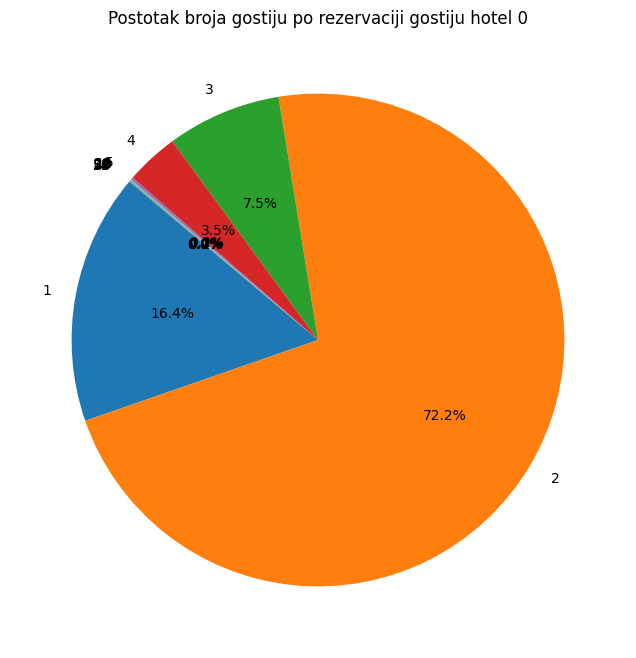

In [31]:
hotel0 = df[df['hotel_id']==0]
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = hotel0['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju hotel 0')
plt.show()

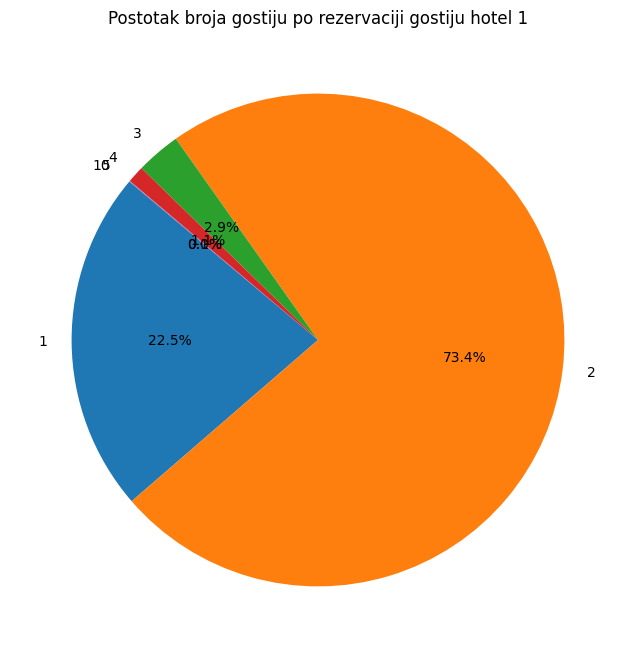

In [32]:
hotel1 = df[df['hotel_id']==1]
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = hotel1['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju hotel 1')
plt.show()